# 직원 이직 분석

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.이변량 분석 

In [3]:
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3


### (1) 범주형 Feature --> Target
① 교차표(pd.crosstab())  
② 시각화( Stacked Bar, Mosaic)  
③ 가설검정(카이제곱검정)

#### 1) Gender --> Attrtion

In [4]:
data['Gender'].isna().sum()

0

① 교차표(pd.crosstab())

In [5]:
pd.crosstab(data['Gender'], data['Attrition'])

Attrition,0,1
Gender,,
Female,421,69
Male,629,131


② 시각화( Stacked Bar, Mosaic)

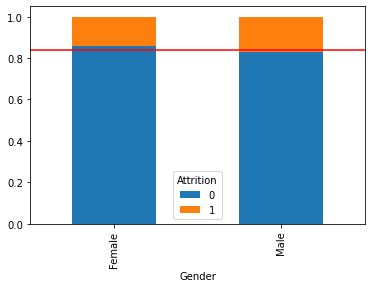

In [6]:
temp = pd.crosstab(data['Gender'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

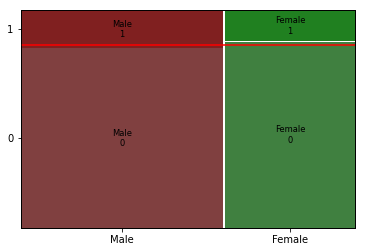

In [7]:
mosaic(data, [ 'Gender','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

- 성별에 따른 이직률과 평균 이직률이 거의 일치한다.
- 따라서 성별과 이직률은 관련이 거의 없다.

③ 가설검정(카이제곱검정)

In [8]:
table = pd.crosstab(data['Gender'], data['Attrition'])
print('교차표\n', table)
print('-' * 50)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
Gender             
Female     421   69
Male       629  131
--------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
기대빈도
 [[411.6  78.4]
 [638.4 121.6]]


- 성별에 따른 이직률과 평균 이직률이 거의 일치한다. 따라서 성별과 이직률은 관련이 거의 없다.
- 카이제곱통계량이 자유도인 1의 1.98배이다. p-value는 0.15로 0.05보다 크다. 따라서 성별과 이직률은 수치적으로 관련이 거의 없다.

#### 2) MaritalStatus --> Attrtion

In [9]:
data['MaritalStatus'].isna().sum()

0

① 교차표(pd.crosstab())

In [10]:
pd.crosstab(data['MaritalStatus'], data['Attrition'])

Attrition,0,1
MaritalStatus,,
Divorced,253,23
Married,501,69
Single,296,108


② 시각화( Stacked Bar, Mosaic)

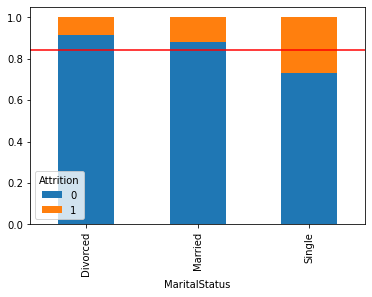

In [11]:
temp = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

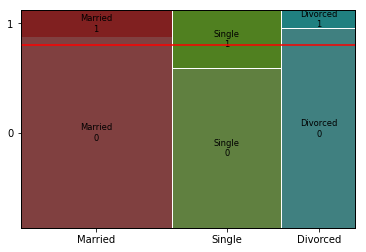

In [12]:
mosaic(data, [ 'MaritalStatus','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

- 결혼을 하지 않은 직원은 이직률이 매우 높다.
- 기혼, 이혼 직원은 이직률이 평균보다 낮다.
- 결혼 유무 및 부양 가족의 유무가 이직률에 영향을 미치는 것으로 추정할 수 있다.

③ 가설검정(카이제곱검정)

In [13]:
table = pd.crosstab(data['MaritalStatus'], data['Attrition'])
print('교차표\n', table)
print('-' * 50)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition        0    1
MaritalStatus          
Divorced       253   23
Married        501   69
Single         296  108
--------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
기대빈도
 [[231.84  44.16]
 [478.8   91.2 ]
 [339.36  64.64]]


- 결혼을 하지 않은 직원은 이직률이 매우 높다. 기혼, 이혼 직원은 이직률이 평균보다 낮다. 결혼 유무 및 부양 가족의 유무가 이직률에 영향을 미치는 것으로 추정할 수 있다.
- 자유도가 2인데 카이제곱통계량이 53으로 차이가 있음을 알 수 있다. p-value가 1e-12이므로 매우 작다. 따라서 수치적으로 결혼 여부와 이직률은 강한 관계가 있다.

#### 3) JobSatisfaction --> Attrtion

In [14]:
data['JobSatisfaction'].isna().sum()

0

① 교차표(pd.crosstab())

In [15]:
pd.crosstab(data['JobSatisfaction'], data['Attrition'])

Attrition,0,1
JobSatisfaction,,
1,197,53
2,196,39
3,308,60
4,349,48


② 시각화( Stacked Bar, Mosaic)

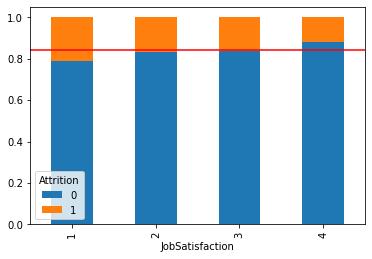

In [16]:
temp = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

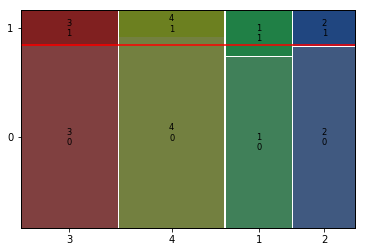

In [17]:
mosaic(data, [ 'JobSatisfaction','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

- 직업 만족도가 1이면 이직률이 높다.
- 직업 만족도가 2, 3이면 이직률이 평균과 비슷하다.
- 직업 만족도가 4이면 이직률이 평균보다 낮다.
- 따라서 직업 만족도와 이직률은 관련이 있다.

③ 가설검정(카이제곱검정)

In [18]:
table = pd.crosstab(data['JobSatisfaction'], data['Attrition'])
print('교차표\n', table)
print('-' * 50)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition          0   1
JobSatisfaction         
1                197  53
2                196  39
3                308  60
4                349  48
--------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
기대빈도
 [[210.    40.  ]
 [197.4   37.6 ]
 [309.12  58.88]
 [333.48  63.52]]


- 직업 만족도가 높을수록 이직률이 낮다. 따라서 직업 만족도와 이직률은 관련이 있다.
- 자유도가 3인데 카이제곱통계량이 9.6이므로 약 3배이다. p-value가 0.02로 0.05보다 약간 낮다. 따라서 중간 관계가 있다.

#### 4) OverTime --> Attrtion

In [19]:
data['OverTime'].isna().sum()

0

① 교차표(pd.crosstab())

In [20]:
pd.crosstab(data['OverTime'], data['Attrition'])

Attrition,0,1
OverTime,,
No,803,93
Yes,247,107


② 시각화( Stacked Bar, Mosaic)

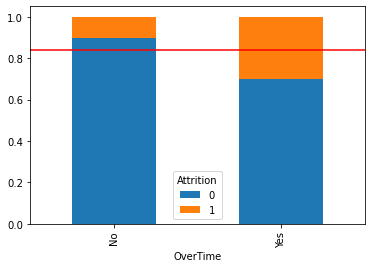

In [21]:
temp = pd.crosstab(data['OverTime'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

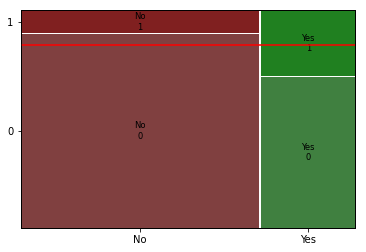

In [22]:
mosaic(data, [ 'OverTime','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

- 야근을 하지 않는 직원의 이직률은 평균보다 낮다.
- 야근을 하는 직원은 이직률이 평균보다 높다.
- 따라서 야근 여부는 이직률과 관련이 있다.

③ 가설검정(카이제곱검정)

In [23]:
table = pd.crosstab(data['OverTime'], data['Attrition'])
print('교차표\n', table)
print('-' * 50)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition    0    1
OverTime           
No         803   93
Yes        247  107
--------------------------------------------------
카이제곱통계량 72.89605419432075
p-value 1.366611233098835e-17
기대빈도
 [[752.64 143.36]
 [297.36  56.64]]


- 야근 여부와 이직률은 비례한다. 따라서 야근 여부는 이직률과 관련이 있다.
- 자유도가 1이고 카이제곱통계량이 72이므로 72배이다. p-value는 1e-17이므로 0.05보다 매우 작다. 따라서 야근여부와 이직률은 강한 관계가 있다.

#### 5) WorkLifeBalance --> Attrtion

In [24]:
data['WorkLifeBalance'].isna().sum()

0

① 교차표(pd.crosstab())

In [25]:
pd.crosstab(data['WorkLifeBalance'], data['Attrition'])

Attrition,0,1
WorkLifeBalance,,
1,49,20
2,251,46
3,639,108
4,111,26


② 시각화( Stacked Bar, Mosaic)

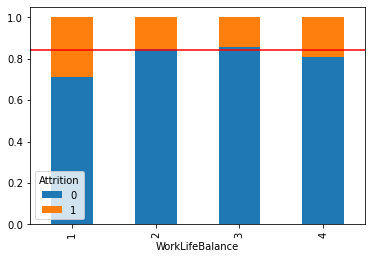

In [26]:
temp = pd.crosstab(data['WorkLifeBalance'], data['Attrition'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-data['Attrition'].mean(), color = 'r')
plt.show()

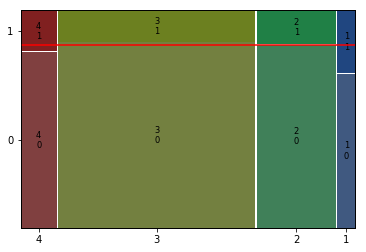

In [27]:
mosaic(data, [ 'WorkLifeBalance','Attrition'])
plt.axhline(1- data['Attrition'].mean(), color = 'r')
plt.show()

- 워라벨이 낮은(1) 직원의 이직률이 평균보다 높다.
- 워라벨이 중간인(2,3) 직원의 이직률은 평균과 비슷하다.
- 워라벨이 높은(4) 직원의 이직률이 평균보다 높다.
- 워라벨과 이직률이 반비례할 것 같으나, 워라벨이 좋은(4) 직원의 이직률이 높다는 것이 특이하며 워라벨과 이직률의 관련이 적어보인다.

③ 가설검정(카이제곱검정)

In [28]:
table = pd.crosstab(data['WorkLifeBalance'], data['Attrition'])
print('교차표\n', table)
print('-' * 50)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Attrition          0    1
WorkLifeBalance          
1                 49   20
2                251   46
3                639  108
4                111   26
--------------------------------------------------
카이제곱통계량 10.940810822342664
p-value 0.012050277390233675
기대빈도
 [[ 57.96  11.04]
 [249.48  47.52]
 [627.48 119.52]
 [115.08  21.92]]


- 워라벨과 이직률이 반비례할 것 같으나, 워라벨이 좋은(4) 직원의 이직률이 높다는 것이 특이하며 워라벨과 이직률의 관련이 적어보인다.
- 자유도가 3이고, 카이제곱통계량이 10.9로 약 3배이다. p-value는 0.012로 0.05보다 작다. 워라벨과 이직률은 중간관계에 있다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [29]:
data['Age'].isna().sum()

0

① 그래프 : histogram, densityplot

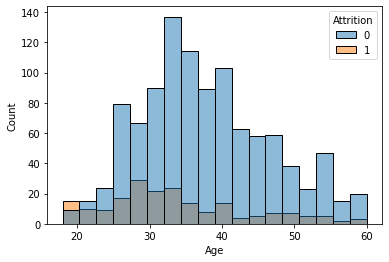

In [30]:
sns.histplot(data=data, x='Age', hue='Attrition')
plt.show()

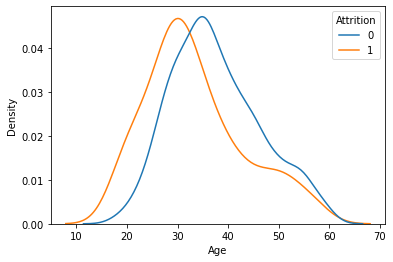

In [31]:
sns.kdeplot(data=data, x='Age', hue='Attrition', common_norm = False)
plt.show()

- 이직자의 평균 연령이 재직자의 평균 연령보다 낮다.
- 40대 이상에서 이직자 비율이 일반적인 정규 분포보다 약간 증가하는 경향이 있다.
- 따라서 나이와 이직률은 관련이 있다.

② 수치화 : 로지스틱회귀

In [32]:
model = sm.Logit(data['Attrition'], data['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


- 재직자와 이직자 그래프의 평균에 차이가 크므로 나이와 이직률은 관련이 있다.
- p-value가 4e-100이므로 0.05에 비해 매우 작다. 따라서 나이와 이직률은 강한 관계가 있다.

#### 2) DistanceFromHome --> Attrtion


In [33]:
print(data['DistanceFromHome'].isna().sum())

# 결측치 제거
data2 = data[data['DistanceFromHome'].notna()]

54


① 그래프 : histogram, densityplot

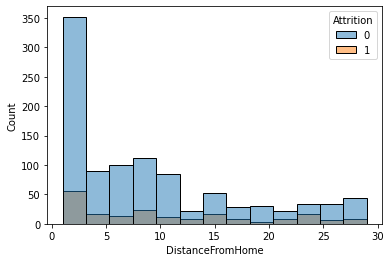

In [34]:
sns.histplot(data=data2, x='DistanceFromHome', hue='Attrition')
plt.show()

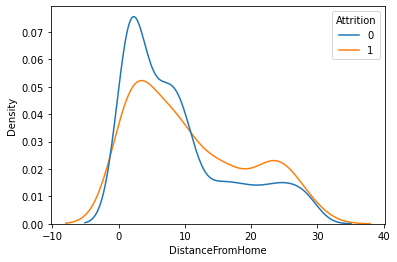

In [35]:
sns.kdeplot(data=data2, x='DistanceFromHome', hue='Attrition', common_norm = False)
plt.show()

- 집이 10km보다 가까운 사람은 이직률이 평균보다 낮다.
- 집이 10km 거리에 있는 사람의 이직률은 평균과 비슷하다.
- 집이 10km보다 먼 사람은 이직률이 평균보다 높다.
- 따라서 집까지의 거리와 이직률은 관련이 있다.

② 수치화 : 로지스틱회귀

In [36]:
model = sm.Logit(data2['Attrition'], data2['DistanceFromHome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


- 집까지의 거리와 이직률이 비례하므로 관련이 있다.
- p-value가 2e-44이므로 0.05보다 매우 작다. 따라서 집까지의 거리와 이직률은 강한 관계가 있다.

#### 3) MonthlyIncome --> Attrtion


In [37]:
print(data['MonthlyIncome'].isna().sum())

0


① 그래프 : histogram, densityplot

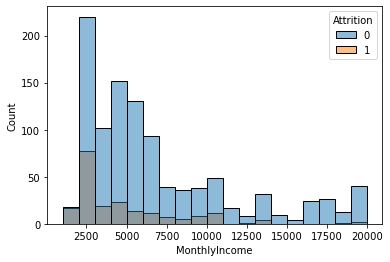

In [38]:
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition')
plt.show()

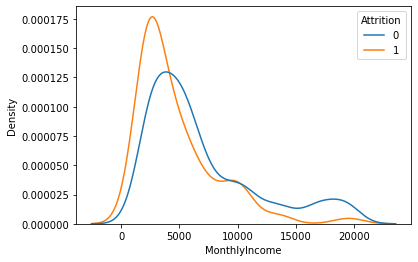

In [39]:
sns.kdeplot(data=data, x='MonthlyIncome', hue='Attrition', common_norm = False)
plt.show()

- 월급이 4000 달러 이하에서 이직률이 매우 높다.
- 월급이 4000 달러 이상에서 이직률이 평균보다 낮다.
- 월급이 10000 달러인 구간에서 평균보다 이직률이 높은 이상치가 있다.
- 월급과 이직률은 관련이 있다.

② 수치화 : 로지스틱회귀

In [40]:
model = sm.Logit(data['Attrition'], data['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


- 월급과 이직률이 반비례하므로 관련이 있다.
- p-value가 1e-71이므로 0.05보다 매우 작다. 따라서 월급과 이직률은 강한 관계가 있다.

#### 4) NumCompaniesWorked --> Attrtion


In [41]:
print(data['NumCompaniesWorked'].isna().sum())

# 결측치 제거
data2 = data[data['NumCompaniesWorked'].notna()]

21


① 그래프 : histogram, densityplot

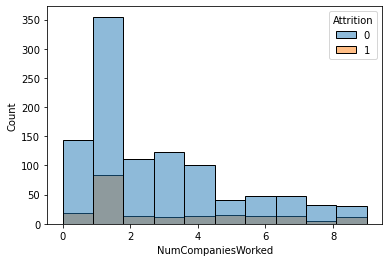

In [42]:
sns.histplot(data=data2, x='NumCompaniesWorked', bins=10, hue='Attrition')
plt.show()

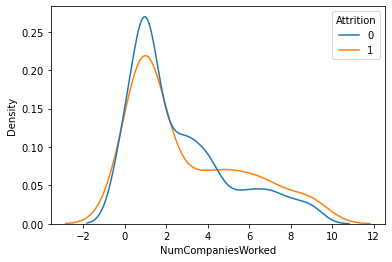

In [43]:
sns.kdeplot(data=data2, x='NumCompaniesWorked', hue='Attrition', common_norm = False)
plt.show()

- 우리 회사가 첫 직장인 사람의 이직률은 평균과 같다.
- 우리 회사가 두 번째에서 다섯 번째 직장인 사람의 이직률은 평균보다 낮다.
- 우리 회사가 여섯 번째 직장인 사람부터 이직률이 평균보다 높다.
- 따라서 다닌 회사의 수와 이직률은 관계가 있다.

② 수치화 : 로지스틱회귀

In [44]:
model = sm.Logit(data2['Attrition'], data2['NumCompaniesWorked'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.564716
         Iterations 6
NumCompaniesWorked    2.545612e-45
dtype: float64


- 다닌 회사의 수와 이직률은 비례한다.
- p-value가 2e-45이므로 0.05보다 매우 작다. 따라서 이직률과 다닌 회사의 수는 강한 관계가 있다.

#### 5) TotalWorkingYears --> Attrtion


In [45]:
print(data['TotalWorkingYears'].isna().sum())

0


① 그래프 : histogram, densityplot

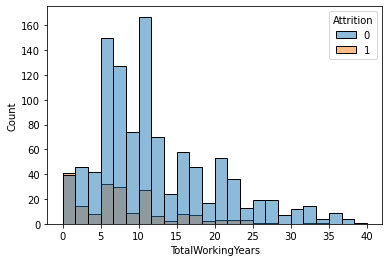

In [46]:
sns.histplot(data=data, x='TotalWorkingYears', hue='Attrition')
plt.show()

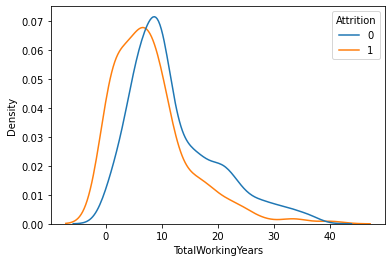

In [47]:
sns.kdeplot(data=data, x='TotalWorkingYears', hue='Attrition', common_norm = False)
plt.show()

- 경력 연수가 낮으면 이직률이 높다.
- 경력 연수가 높을수록 이직률이 낮다.
- 따라서 경력 연수와 이직률은 반비례 관계에 있으므로 관계가 있다.

② 수치화 : 로지스틱회귀

In [48]:
model = sm.Logit(data['Attrition'], data['TotalWorkingYears'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.432906
         Iterations 6
TotalWorkingYears    1.867338e-74
dtype: float64


- 경력 연수와 이직률은 반비례한다.
- p-value가 1e-74로 0.05보다 매우 작으므로 경력 연수와 이직률은 강한 관계가 있다.

## 2.관계 정리

### 1) 강한관계의 변수

1. 결혼여부
2. 야근 여부
3. 나이
4. 집까지의 거리
5. 월급
6. 다닌 회사의 수
7. 경력 연수

### 2) 중간관계의 변수

1. 직업 만족도
1. 워라벨

### 3) (거의)관계 없음

1. 성별

## 3. 추가 분석

### 1) 분석1

월급이 10000달러 근방에서 이직률이 갑자기 상승하므로 구간 내의 직원을 분석해보려고 한다.

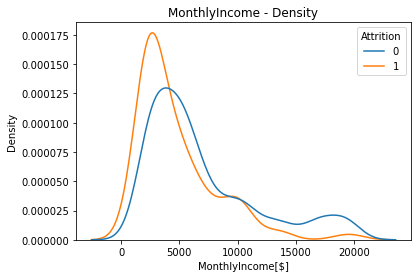

In [49]:
g = sns.kdeplot(data=data, x='MonthlyIncome', hue='Attrition', common_norm = False)
plt.title('MonthlyIncome - Density')
plt.xlabel('MonthlyIncome[$]')
# plt.savefig('01.png', dpi=300)
plt.show()

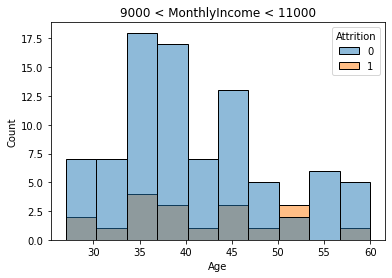

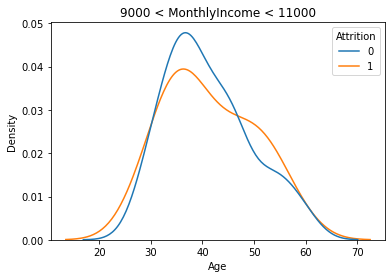

Optimization terminated successfully.
         Current function value: 0.478512
         Iterations 5
Age    5.274086e-09
dtype: float64


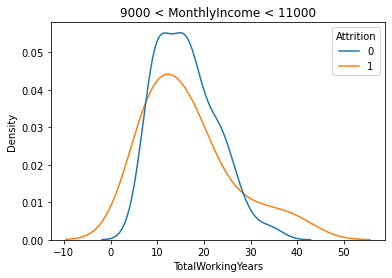

Optimization terminated successfully.
         Current function value: 0.500754
         Iterations 5
TotalWorkingYears    7.800905e-08
dtype: float64


In [50]:
data2 = data[(data['MonthlyIncome'] > 9000) & (data['MonthlyIncome'] < 11000)]

plt.title('9000 < MonthlyIncome < 11000')
sns.histplot(data=data2, x='Age', bins=10, hue='Attrition')
# plt.savefig('02.png', dpi=300)
plt.show()

plt.title('9000 < MonthlyIncome < 11000')
sns.kdeplot(data=data2, x='Age', hue='Attrition', common_norm = False)
# plt.savefig('03.png', dpi=300)
plt.show()

model = sm.Logit(data2['Attrition'], data2['Age'])
result = model.fit()
print(result.pvalues)

plt.title('9000 < MonthlyIncome < 11000')
sns.kdeplot(data=data2, x='TotalWorkingYears', hue='Attrition', common_norm = False)
# plt.savefig('04.png', dpi=300)
plt.show()

model = sm.Logit(data2['Attrition'], data2['TotalWorkingYears'])
result = model.fit()
print(result.pvalues)

- 월급이 10000달러인 직원 중에서 나이가 45세 이상인 직원에서 이직률이 높다.
- 월급이 10000달러인 직원 중에서 경력연수가 30년 이상인 직원이 이직률이 높다.
- 따라서 월급이 10000달러 이상인 직원에서 이직률이 상승한 것은 정년퇴직 등과 연관되어 있음을 추측할 수 있다.

### 2) 분석2

월급이 적은 직원의 이직률이 높은 이유를 분석해보려고 한다.

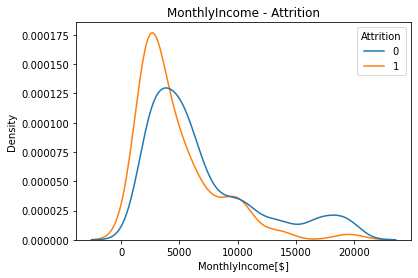

In [51]:
sns.kdeplot(data=data, x='MonthlyIncome', hue='Attrition', common_norm = False)
plt.title('MonthlyIncome - Attrition')
plt.xlabel('MonthlyIncome[$]')
# plt.savefig('05.png', dpi=300)
plt.show()

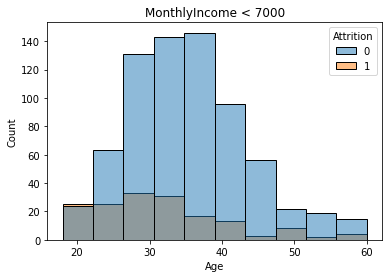

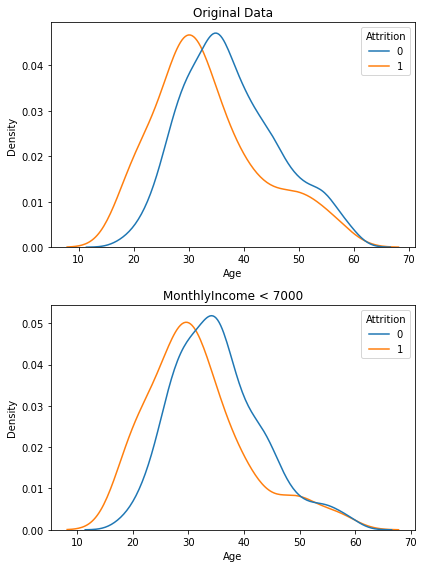

Optimization terminated successfully.
         Current function value: 0.462176
         Iterations 5
Age    3.038090e-65
dtype: float64


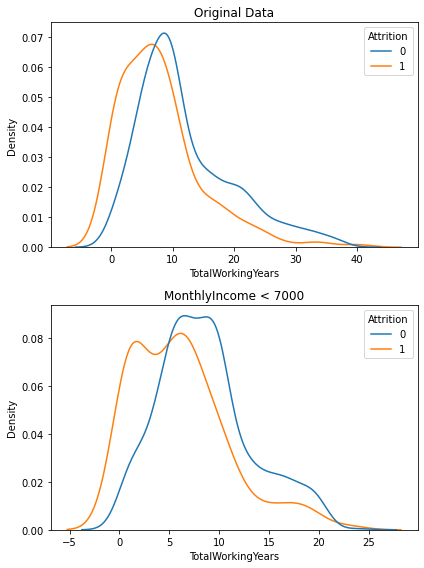

Optimization terminated successfully.
         Current function value: 0.460920
         Iterations 6
TotalWorkingYears    1.231047e-54
dtype: float64


In [52]:
data3 = data[data['MonthlyIncome'] < 7000]

plt.title('MonthlyIncome < 7000')
sns.histplot(data=data3, x='Age', bins=10, hue='Attrition')
# plt.savefig('06.png', dpi=300)
plt.show()

plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
sns.kdeplot(data=data, x='Age', hue='Attrition', common_norm = False)
plt.title('Original Data')
plt.subplot(2,1,2)
sns.kdeplot(data=data3, x='Age', hue='Attrition', common_norm = False)
plt.title('MonthlyIncome < 7000')
plt.tight_layout()
# plt.savefig('07.png', dpi=300)
plt.show()

model = sm.Logit(data3['Attrition'], data3['Age'])
result = model.fit()
print(result.pvalues)

plt.figure(figsize=(6,8))
plt.subplot(2,1,1)
plt.title('Original Data')
sns.kdeplot(data=data, x='TotalWorkingYears', hue='Attrition', common_norm = False)
plt.subplot(2,1,2)
sns.kdeplot(data=data3, x='TotalWorkingYears', hue='Attrition', common_norm = False)
plt.title('MonthlyIncome < 7000')
plt.tight_layout()
# plt.savefig('08.png', dpi=300)
plt.show()

model = sm.Logit(data3['Attrition'], data3['TotalWorkingYears'])
result = model.fit()
print(result.pvalues)

- 나이에 따른 이직률과 월급이 7000달러 미만인 직원의 나이에 따른 이직률을 비교해보았으나 큰 차이가 없었다.
- 경력연수에 따른 이직률과 월급이 7000달러 미만인 직원의 경력연수에 따른 이직률을 비교해보았는데 월급이 7000달러 미만인 직원 중에 경력연수가 매우 짧은 직원들이 많이 이직하는 것을 확인할 수 있었다.